# Hexes_in_Hex

There is a fractal nature to this. We can take an one hexagon, and place 6 other hexagons inside that hexagon. We can then do the same for each of the smaller hexagons, ad infinitum.

Since we have computed "Lattice Points" for each Hexagon, it is now easy to draw the smaller inner hexagons.

In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *

## The Idea behind Hexes-in-Hex

Take a "base" hexagon. It has Six spokes. Each spoke is trisected. The points are called `sa` and `sb` in our notation.
Draw six smaller hexagons, each one centered on one of the 6 'sb' of size = size/3.


## Try it on one Hexagon

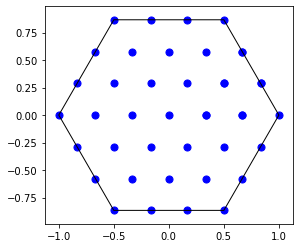

In [11]:
h = Hex()
h.render(fc='none', color='k')
lat = h.get_lattice_points() #dictionary of lattice coords
for pt in lat.values():
    h.plot_points(pt, color='b')
plt.axis('scaled');

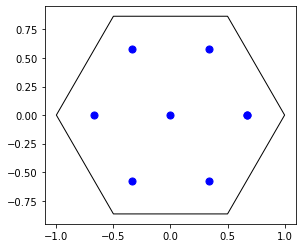

In [12]:
h = Hex()
h.render(fc='none', color='k')
lat = h.get_lattice_points() #dictionary of lattice coords
for name, pt in lat.items():
    if name in ['c', 'sb']:
        h.plot_points(pt, color='b')
plt.axis('scaled');

(-3.6, 9.6, -2.857883832488648, 2.857883832488648)

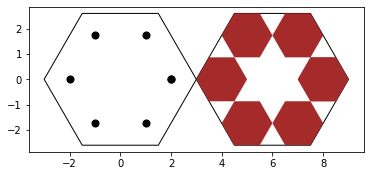

In [35]:
size = 3
h0 = Hex(0,0,size)
h1 = Hex(6,0,size)
lat0 = h0.get_lattice_points()
h0.render(fc='none', color='k')
h0.plot_points(lat0['sb'])

#Let's try plotting smaller Hexagons
lat1 = h1.get_lattice_points()
h1.render(fc='none', color='k')
for pt in lat1['sb']:
    h1.render_regular_polygon_inside_hexagon(6, center_pt=pt, polygon_size=size/3, fc='brown')

plt.axis('scaled')

# Grid Variations

1. Two colors. One for Big, one for small
2. Checker Board: Alternating Big/Small colors
3. Random Colors inside. Big in one color, smaller hexes in sequence.
4. Hex-in-hex-in-hex


In [105]:
def hex_cookie_cutter(h, color_scheme, directions_d, ax, **kwargs):

    if ax is None:
        ax = plt.gca()
        
    if 'big' in color_scheme:
        h.render(fc=color_scheme['big'], color='k', lw = 2, **kwargs)
    else:
        h.render(fc='none', color='k', lw=3)
    lat = h.get_lattice_points()
    
    if 'small' in color_scheme:
        fc = color_scheme['small']
    else:
        fc = 'none'
        
    try:
        for hnum, pt in enumerate(lat['sb'][:6]): # the :6 is needed because lat's might have the 0th point repeated as the 7th.
            h.render_regular_polygon_inside_hexagon(6, center_pt=pt, polygon_size=h.size/3, fc=fc[hnum], **kwargs)
    except:
        print(hnum, fc, len(lat['sb']))
    return ax,

In [107]:
def cookie_sheets(nbk, design_keyword):
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    
    directions_d = {}    
    primary =  ['red', 'blue', 'green', 'brown', 'black', 'orange']

    #Color Variations
    for col_iter in range(12):
        print(col_iter, sep=" ")
                                      
        color_scheme = {'big': np.random.choice(primary),
                       'small': get_random_colorfamily()
                       }
        
        hg, fig, ax, num_rows, num_cols = pf.grid_10('lightgray')
        for idx, h in enumerate(hg.hlist):
            ax = hex_cookie_cutter(h, color_scheme, directions_d, ax)

        pf.save_file(fig, 
                     design_keyword, 
                     nbk = nbk,
                     num_rows=num_rows, 
                     num_cols=num_cols
                )

        plt.close()
    logging.info('Finished')
    
def main():
    
    #SHEET Variables: COLOR, LINE vs Shape, Axis. Which Points?
    nbk = 21    
    design_keyword = "hx_in_hx_"

    cookie_sheets(nbk, design_keyword)

if __name__ == '__main__':
    main()


0
1
2
3
4
5
6
7
8
9
10
11
